(stereo-subsetting-demo)=
# Subsetting Stereographic Data

### With the toolbox, we used to do this:

In [1]:
import copernicusmarine as cmt
dataset_lonlat = cmt.open_dataset(
    dataset_id="cmems_mod_arc_bgc_my_ecosmo_P1D-m", 
    variables=["chl", "zooc", "o2"], 
    minimum_latitude=64.99684, 
    maximum_latitude=90, 
    minimum_longitude=-180, 
    maximum_longitude=180,
)
dataset_lonlat

INFO - 2025-03-20T09:02:26Z - Selected dataset version: "202105"
INFO - 2025-03-20T09:02:26Z - Selected dataset part: "default"


<xarray.Dataset>
Dimensions:    (time: 5844, depth: 1, latitude: 101, longitude: 1440)
Coordinates:
  * depth      (depth) float32 3.0
  * latitude   (latitude) float64 65.0 65.25 65.5 65.75 ... 89.5 89.75 90.0
  * longitude  (longitude) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * time       (time) datetime64[ns] 2007-01-01 2007-01-02 ... 2022-12-31
Data variables:
    chl        (time, depth, latitude, longitude) float32 dask.array<chunksize=(3066, 1, 10, 1440), meta=np.ndarray>
    zooc       (time, depth, latitude, longitude) float32 dask.array<chunksize=(3066, 1, 10, 1440), meta=np.ndarray>
    o2         (time, depth, latitude, longitude) float32 dask.array<chunksize=(3066, 1, 10, 1440), meta=np.ndarray>
Attributes:
    source:       NERSC-HYCOM model fields
    references:   http://topaz.nersc.no
    institution:  NERSC, Jahnebakken 3, 5006 Bergen, Norway
    title:        Arctic Ocean Biogeochemistry Reanalysis, 25km surface daily...
    Conventions:  CF-1.4
    history:      Created by program hyc2proj, version V0.3

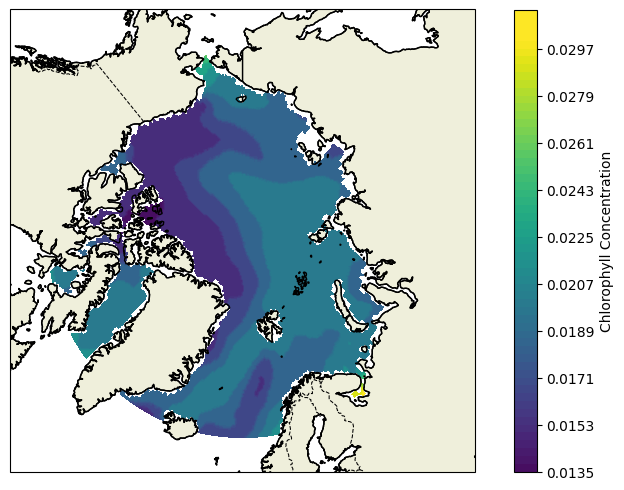

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Select chlorophyll data for the given date
chl = dataset_lonlat.sel(time="2021-01-01").chl.squeeze() # No need for slice() if selecting one time

# Create figure and axis with PlateCarree projection
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.NorthPolarStereo()})

# Add geographical features
ax.set_extent([-180, 180, 60, 90], ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle="--", linewidth=0.75)
ax.add_feature(cfeature.LAND, edgecolor="black")

# Create filled contour plot
contour = ax.contourf(chl.longitude, chl.latitude, chl, levels=60, cmap='viridis', transform = ccrs.PlateCarree(), vmin=0.0130, vmax=0.03)

# Add colorbar
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', fraction=0.046, pad=0.05)
cbar.set_label("Chlorophyll Concentration")


# Show the plot
plt.show()


### But now we implemented:

Notice that the variable input are different and the dataset_part is specified:
- from m\*imum_longitude and m\*imum_latitude, we set now m\*imum_x and m\*imum_y to limit the geographic subset.
- we need to specify the dataset part, as the originalGrid part shares the same 'dataset_id' with the lon/lat part.

To better understand this, you can also try to describe, with `copernicusmarine describe -i dataset_id` in the terminal.

In [3]:
import copernicusmarine as cmt
dataset_stereographic = cmt.open_dataset(
    dataset_id="cmems_mod_arc_bgc_my_ecosmo_P1D-m", 
    variables=["chl", "zooc", "o2"], 
    minimum_y=-20, 
    maximum_y=20, 
    minimum_x=-20, 
    maximum_x=20,
    dataset_part="originalGrid"
)
dataset_stereographic

INFO - 2025-03-20T09:06:13Z - Selected dataset version: "202105"
INFO - 2025-03-20T09:06:13Z - Selected dataset part: "originalGrid"
/Users/rjester/.asdf/installs/python/3.9.18/lib/python3.9/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "y" starting at index 176. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/Users/rjester/.asdf/installs/python/3.9.18/lib/python3.9/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "x" starting at index 64. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


<xarray.Dataset>
Dimensions:    (time: 5844, depth: 1, y: 161, x: 161)
Coordinates:
  * depth      (depth) float32 3.0
    latitude   (y, x) float32 dask.array<chunksize=(84, 64), meta=np.ndarray>
    longitude  (y, x) float32 dask.array<chunksize=(84, 64), meta=np.ndarray>
  * time       (time) datetime64[ns] 2007-01-01 2007-01-02 ... 2022-12-31
  * x          (x) float32 -20.0 -19.75 -19.5 -19.25 ... 19.25 19.5 19.75 20.0
  * y          (y) float32 -20.0 -19.75 -19.5 -19.25 ... 19.25 19.5 19.75 20.0
Data variables:
    chl        (time, depth, y, x) float32 dask.array<chunksize=(5844, 1, 84, 64), meta=np.ndarray>
    zooc       (time, depth, y, x) float32 dask.array<chunksize=(5844, 1, 84, 64), meta=np.ndarray>
    o2         (time, depth, y, x) float32 dask.array<chunksize=(5844, 1, 84, 64), meta=np.ndarray>
Attributes:
    source:       NERSC-HYCOM model fields
    references:   http://topaz.nersc.no
    institution:  NERSC, Jahnebakken 3, 5006 Bergen, Norway
    title:        Arctic Ocean Biogeochemistry Reanalysis, 25km surface daily...
    Conventions:  CF-1.4
    history:      Created by program hyc2proj, version V0.3

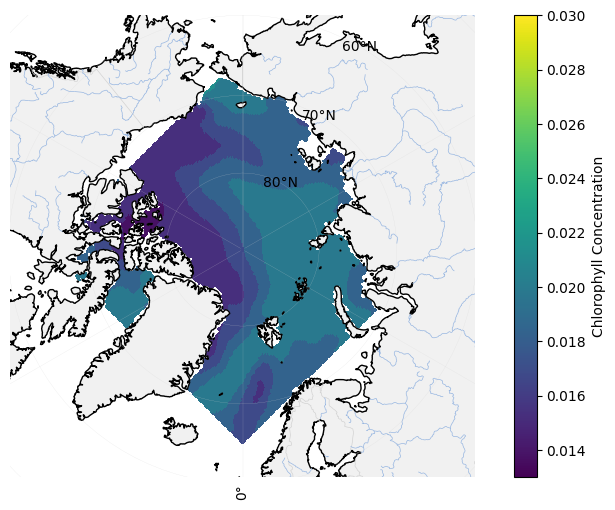

In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Select chlorophyll data for the given date
chl = dataset_stereographic.sel(time="2021-01-01").chl.squeeze() # No need for slice() if selecting one time

fig = plt.figure(figsize=(10,6), dpi=100)
    #fig = plt.figure(figsize=(10,8), dpi=100)
fig.patch.set_visible(True)
fig.set_facecolor("white")

# Create an "ax" from which we add the projection
ax = plt.axes(projection=ccrs.NorthPolarStereo())


gl2 = ax.gridlines(draw_labels=True, color = 'lightgray', linewidth=0.1)
gl2.right_labels = False
gl2.top_labels = False
ax.axis('off')


ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())

contour = ax.pcolormesh(chl.x*100000, chl.y*100000, chl, cmap='viridis', transform=ccrs.NorthPolarStereo(-45), vmin=0.0130, vmax=0.03)
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor="lightgray")
ax.add_feature(cfeature.RIVERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, linewidth=0.5, facecolor='#f1f1f1', edgecolor='lightgray', zorder=1)
# # Add colorbar
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', fraction=0.046, pad=0.05)
cbar.set_label("Chlorophyll Concentration")

plt.xlabel("x (m)")
plt.ylabel("y (m)")
# Show the plot
plt.show()

### What about the CLI?

In [ ]:
# We used to do it like this, selecting longitude and latitude (still can be done)
!copernicusmarine subset -i cmems_mod_arc_bgc_my_ecosmo_P1D-m -o cmems_mod_arc_bgc_my_ecosmo_P1D-m_subset -v chl -v zooc -v o2 --minimum-latitude 60 --maximum-latitude 85 --minimum-longitude -10 --maximum-longitude 180 --dry-run

INFO - 2025-03-13T08:36:51Z - Selected dataset version: "202105"
INFO - 2025-03-13T08:36:51Z - Selected dataset part: "default"
{
  "file_path": "cmems_mod_arc_bgc_my_ecosmo_P1D-m_subset/cmems_mod_arc_bgc_my_ecosmo_P1D-m_chl-zooc-o2_10.00W-180.00E_60.00N-85.00N_10.00-180.00m_2007-01-01-2022-12-31.nc",
  "output_directory": "cmems_mod_arc_bgc_my_ecosmo_P1D-m_subset",
  "filename": "cmems_mod_arc_bgc_my_ecosmo_P1D-m_chl-zooc-o2_10.00W-180.00E_60.00N-85.00N_10.00-180.00m_2007-01-01-2022-12-31.nc",
  "file_size": 5143.246022900763,
  "data_transfer_size": 6902.291541984732,
  "variables": [
    "chl",
    "zooc",
    "o2"
  ],
  "coordinates_extent": [
    {
      "minimum": -10.0,
      "maximum": 180.0,
      "unit": "degrees_east",
      "coordinate_id": "longitude"
    },
    {
      "minimum": 60.0,
      "maximum": 85.0,
      "unit": "degrees_north",
      "coordinate_id": "latitude"
    },
    {
      "minimum": "2007-01-01T00:00:00+00:00",
      "maximum": "2022-12-31T00:00:00+00:

In [ ]:
# We want to specify the part 
!copernicusmarine subset -i cmems_mod_arc_bgc_my_ecosmo_P1D-m -v chl -v zooc -v o2 --minimum-latitude 60 --maximum-latitude 85 --minimum-longitude -10 --maximum-longitude 180 --dry-run --dataset-part originalGrid

ERROR - 2025-03-13T08:39:33Z - Lon lat subset not available in original grid datasets: You cannot specify longitude and latitude when using the 'originalGrid' dataset part yet. Try using ``--minimum-x``, ``--maximum-x``, ``--minimum-y`` and ``--maximum-y``.


In [ ]:
# If we specify an originalGrid part, we need to select the correct variables:
!copernicusmarine subset -i cmems_mod_arc_bgc_my_ecosmo_P1D-m -v chl -v zooc -v o2 --minimum-y 25 --maximum-y 85 --minimum-x -10 --maximum-x 180 --dry-run --dataset-part originalGrid

INFO - 2025-03-13T08:39:40Z - Selected dataset version: "202105"
INFO - 2025-03-13T08:39:40Z - Selected dataset part: "originalGrid"
WARNING - 2025-03-13T08:39:42Z - Some of your subset selection [25.0, 85.0] for the y dimension exceed the dataset coordinates [-43.0, 28.0]
WARNING - 2025-03-13T08:39:42Z - Some of your subset selection [-10.0, 180.0] for the x dimension exceed the dataset coordinates [-36.0, 38.0]
{
  "file_path": "cmems_mod_arc_bgc_my_ecosmo_P1D-m_chl-zooc-o2_-10.00x_38.00X_25.00y_28.00Y_10.00-38.00m_2007-01-01-2022-12-31.nc",
  "output_directory": ".",
  "filename": "cmems_mod_arc_bgc_my_ecosmo_P1D-m_chl-zooc-o2_-10.00x_38.00X_25.00y_28.00Y_10.00-38.00m_2007-01-01-2022-12-31.nc",
  "file_size": 111.94121374045802,
  "data_transfer_size": 575.190961832061,
  "variables": [
    "chl",
    "zooc",
    "o2"
  ],
  "coordinates_extent": [
    {
      "minimum": -10.0,
      "maximum": 38.0,
      "unit": "100  km",
      "coordinate_id": "x"
    },
    {
      "minimum": 2

In [ ]:
# And we can also use the shortcuts for either variable
!copernicusmarine subset -i cmems_mod_arc_bgc_my_ecosmo_P1D-m -v chl -v zooc -v o2 -y 25 -Y 85 -x -10 -X 180 --dry-run --dataset-part originalGrid

INFO - 2025-03-13T09:16:51Z - Selected dataset version: "202105"
INFO - 2025-03-13T09:16:51Z - Selected dataset part: "originalGrid"
WARNING - 2025-03-13T09:16:54Z - Some of your subset selection [25.0, 85.0] for the y dimension exceed the dataset coordinates [-43.0, 28.0]
WARNING - 2025-03-13T09:16:54Z - Some of your subset selection [-10.0, 180.0] for the x dimension exceed the dataset coordinates [-36.0, 38.0]
{
  "file_path": "cmems_mod_arc_bgc_my_ecosmo_P1D-m_chl-zooc-o2_-10.00x_38.00X_25.00y_28.00Y_10.00-38.00m_2007-01-01-2022-12-31.nc",
  "output_directory": ".",
  "filename": "cmems_mod_arc_bgc_my_ecosmo_P1D-m_chl-zooc-o2_-10.00x_38.00X_25.00y_28.00Y_10.00-38.00m_2007-01-01-2022-12-31.nc",
  "file_size": 111.94121374045802,
  "data_transfer_size": 575.190961832061,
  "variables": [
    "chl",
    "zooc",
    "o2"
  ],
  "coordinates_extent": [
    {
      "minimum": -10.0,
      "maximum": 38.0,
      "unit": "100  km",
      "coordinate_id": "x"
    },
    {
      "minimum": 2

In [ ]:
# it will automatically consider x and y as the dataset part needs.
!copernicusmarine subset -i cmems_mod_arc_bgc_my_ecosmo_P1D-m -v chl -v zooc -v o2 -y 25 -Y 85 -x -10 -X 180 --dry-run

INFO - 2025-03-13T08:41:10Z - Selected dataset version: "202105"
INFO - 2025-03-13T08:41:10Z - Selected dataset part: "default"
WARNING - 2025-03-13T08:41:13Z - Some of your subset selection [25.0, 85.0] for the latitude dimension exceed the dataset coordinates [43.5, 90.0]
{
  "file_path": "cmems_mod_arc_bgc_my_ecosmo_P1D-m_chl-zooc-o2_10.00W-180.00E_43.50N-85.00N_10.00-180.00m_2007-01-01-2022-12-31.nc",
  "output_directory": ".",
  "filename": "cmems_mod_arc_bgc_my_ecosmo_P1D-m_chl-zooc-o2_10.00W-180.00E_43.50N-85.00N_10.00-180.00m_2007-01-01-2022-12-31.nc",
  "file_size": 8504.170572519084,
  "data_transfer_size": 10353.4373129771,
  "variables": [
    "chl",
    "zooc",
    "o2"
  ],
  "coordinates_extent": [
    {
      "minimum": -10.0,
      "maximum": 180.0,
      "unit": "degrees_east",
      "coordinate_id": "longitude"
    },
    {
      "minimum": 43.5,
      "maximum": 85.0,
      "unit": "degrees_north",
      "coordinate_id": "latitude"
    },
    {
      "minimum": "200

### How about when data is in 'm' instead of 'km'?

In [ ]:
# How do we make users understand the subset when trying to subset with meters?
# The numbers needed to specified are quite big.
!copernicusmarine subset -i cmems_mod_arc_phy_my_hflux_P1M-m -y 25000 -Y 850000 -x -10000 -X 1800000 --dry-run --dataset-part originalGrid

INFO - 2025-03-13T09:18:54Z - Selected dataset version: "202411"
INFO - 2025-03-13T09:18:54Z - Selected dataset part: "originalGrid"
{
  "file_path": "cmems_mod_arc_phy_my_hflux_P1M-m_hfds-rsntds_0.00x_1800000.00X_25000.00y_850000.00Y_1991-01-01-2023-12-01.nc",
  "output_directory": ".",
  "filename": "cmems_mod_arc_phy_my_hflux_P1M-m_hfds-rsntds_0.00x_1800000.00X_25000.00y_850000.00Y_1991-01-01-2023-12-01.nc",
  "file_size": 29.380480916030535,
  "data_transfer_size": 100.05496183206107,
  "variables": [
    "hfds",
    "rsntds"
  ],
  "coordinates_extent": [
    {
      "minimum": 0.0,
      "maximum": 1800000.0,
      "unit": "meter",
      "coordinate_id": "x"
    },
    {
      "minimum": 25000.0,
      "maximum": 850000.0,
      "unit": "meter",
      "coordinate_id": "y"
    },
    {
      "minimum": "1991-01-01T00:00:00+00:00",
      "maximum": "2023-12-01T00:00:00+00:00",
      "unit": "iso8601",
      "coordinate_id": "time"
    }
  ],
  "status": "001",
  "message": "The req

In [10]:
!copernicusmarine describe -i cmems_mod_arc_phy_my_hflux_P1M-m -e variables,keywords,description

Fetching catalogue: 100%|█████████████████████████| 2/2 [00:01<00:00,  1.99it/s]
{
  "products": [
    {
      "title": "Arctic Ocean Physics Reanalysis",
      "product_id": "ARCTIC_MULTIYEAR_PHY_002_003",
      "thumbnail_url": "https://mdl-metadata.s3.waw3-1.cloudferro.com/metadata/thumbnails/ARCTIC_MULTIYEAR_PHY_002_003.jpg",
      "digital_object_identifier": "10.48670/moi-00007",
      "sources": [
        "Numerical models"
      ],
      "processing_level": "Level 4",
      "production_center": "MET Norway",
      "datasets": [
        {
          "dataset_id": "cmems_mod_arc_phy_my_hflux_P1M-m",
          "dataset_name": "Arctic Ocean Physics Reanalysis, 12.5km monthly mean",
          "versions": [
            {
              "label": "202411",
              "parts": [
                {
                  "name": "default",
                  "services": [
                    {
                      "service_name": "original-files",
                      "service_short_name": "

### List of datasets that have original projection
We finally include a list of datasets that have the originalGrid dataset part, ni case you want to play around with the datasets.

In [ ]:
datasets_w_originalGrid = [
["cmems_mod_arc_bgc_anfc_ecosmo_P1D-m"],
["cmems_mod_arc_bgc_anfc_ecosmo_P1M-m"],
["cmems_mod_arc_phy_anfc_6km_detided_PT1H-i"],
["cmems_mod_arc_phy_anfc_6km_detided_PT6H-m"],
["cmems_mod_arc_phy_anfc_6km_detided_P1D-m"],
["cmems_mod_arc_phy_anfc_6km_detided_P1M-m"],
["cmems_mod_arc_bgc_my_ecosmo_P1D-m"],
["cmems_mod_arc_bgc_my_ecosmo_P1M"],
["cmems_mod_arc_bgc_my_ecosmo_P1Y"],
["cmems_mod_arc_phy_my_topaz4_P1D-m"],
["cmems_mod_arc_phy_my_topaz4_P1M"],
["cmems_mod_arc_phy_my_topaz4_P1Y"],
["cmems_mod_arc_phy_my_hflux_P1D-m"],
["cmems_mod_arc_phy_my_hflux_P1M-m"],
["cmems_mod_arc_phy_my_mflux_P1D-m",],
["cmems_mod_arc_phy_my_mflux_P1M-m"],
["cmems_mod_arc_phy_my_nextsim_P1M-m"],
["DMI-ARC-SEAICE_BERG_IW-L4-NRT-OBS"],
["DMI-ARC-SEAICE_BERG_MOSAIC_IW-L4-NRT-OBS"],
["cmems_obs-wind_arc_phy_my_l3-s1a-sar-asc-0.01deg_P1D-i"],
["cmems_obs-wind_arc_phy_my_l3-s1a-sar-desc-0.01deg_P1D-i"]
]